<a href="https://colab.research.google.com/github/TurinShayla/Python-Graph-Brain/blob/main/Knowledge_Gain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect to google drive

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import sem

Add the google file link

In [ ]:
#get the url
wb = gc.open_by_key('1SWN0twJvQHvM7_e5LFVMcTVoZ75EZl_YYkyXBeoGS8c')
#get the file
ws = wb.worksheet('Knowledge Gain')

# get_all_values gives a list of rows.
rows = ws.get_all_values()
print(rows)

[['ID', 'Condition', 'Post test', 'Pretest', 'knowledge_gain'], ['SU6052', 'Game', '6', '3', '3'], ['DH5341', 'Game', '7', '6', '1'], ['MA9343', 'Game', '7', '4', '3'], ['DH3764', 'Game', '7', '3', '4'], ['NAF5164', 'Game', '7', '2', '5'], ['DH6528', 'Game', '8', '3', '5'], ['RW9053', 'Video', '6', '3', '3'], ['sy8932', 'Video', '7', '6', '1'], ['DH6641', 'Video', '5', '4', '1'], ['DH9191', 'Video', '7', '4', '3'], ['NA1730', 'Video', '7', '4', '3'], ['MY8520', 'Video', '1', '1', '0'], ['', '', '', '', ''], ['https://statisticsbyjim.com/graphs/box-plot/', '', '', '', '']]


Creae the dataframe

In [ ]:
import pandas as pd
#df=pd.DataFrame.from_records(rows)
df=pd.DataFrame.from_records(rows[1:],columns=rows[0])
#print(df)

Divide based on Game and Video

In [ ]:
grouped=df.groupby(df.Condition)
df_video=grouped.get_group("Video")
df_game=grouped.get_group("Game")
#print(df_game)

Change dataframe to numeric: Pre and post test

In [ ]:
df_video['Pretest']=pd.to_numeric(df_video['Pretest'],errors='coerce')
df_video['Post test']=pd.to_numeric(df_video['Post test'],errors='coerce')

df_game['Pretest']=pd.to_numeric(df_game['Pretest'],errors='coerce')
df_game['Post test']=pd.to_numeric(df_game['Post test'],errors='coerce')

<ipython-input-6-5e97e7602f86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_video['Pretest']=pd.to_numeric(df_video['Pretest'],errors='coerce')
<ipython-input-6-5e97e7602f86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_video['Post test']=pd.to_numeric(df_video['Post test'],errors='coerce')
<ipython-input-6-5e97e7602f86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Calculate the knowledge gain

In [ ]:
df_video['Knowledge_gain']=df_video['Post test']-df_video['Pretest']
df_game['Knowledge_gain']=df_game['Post test']-df_game['Pretest']

<ipython-input-7-735ca74ef7fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_video['Knowledge_gain']=df_video['Post test']-df_video['Pretest']
<ipython-input-7-735ca74ef7fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_game['Knowledge_gain']=df_game['Post test']-df_game['Pretest']


In [ ]:
print(df_video,df_game)

        ID Condition  Post test  Pretest knowledge_gain  Knowledge_gain
6   RW9053     Video          6        3              3               3
7   sy8932     Video          7        6              1               1
8   DH6641     Video          5        4              1               1
9   DH9191     Video          7        4              3               3
10  NA1730     Video          7        4              3               3
11  MY8520     Video          1        1              0               0         ID Condition  Post test  Pretest knowledge_gain  Knowledge_gain
0   SU6052      Game          6        3              3               3
1   DH5341      Game          7        6              1               1
2   MA9343      Game          7        4              3               3
3   DH3764      Game          7        3              4               4
4  NAF5164      Game          7        2              5               5
5   DH6528      Game          8        3              5         

Calculte mean and std of Knowledge gain, pre test, post test

In [ ]:
#df_video['Knowledge_gain']=pd.to_numeric(df_video['Knowledge_gain'],errors='coerce')
video_mean_Kg=df_video["Knowledge_gain"].mean()
video_std_Kg=df_video['Knowledge_gain'].std()
video_se_Kg=sem(df_video['Knowledge_gain'])

video_mean_Pre=df_video["Pretest"].mean()
video_std_Pre=df_video['Pretest'].std()
video_se_Pre=sem(df_video['Pretest'])

video_mean_Post=df_video["Post test"].mean()
video_std_Post=df_video['Post test'].std()
video_se_Post=sem(df_video['Post test'])

#df_game['Knowledge_gain']=pd.to_numeric(df_game['Knowledge_gain'],errors='coerce')
game_mean_Kg=df_game['Knowledge_gain'].mean()
game_std_Kg=df_game['Knowledge_gain'].std()
game_se_Kg= sem(df_video['Knowledge_gain'])

game_mean_Pre=df_game["Pretest"].mean()
game_std_Pre=df_game["Pretest"].std()
game_se_Pre= sem(df_game['Pretest'])

game_mean_Post=df_game["Post test"].mean()
game_std_Post=df_game["Post test"].std()
game_se_Post= sem(df_game['Post test'])
print("Video knowledge gain", video_mean_Kg, video_std_Kg,"\n","Game knowledge gain", game_mean_Kg,game_std_Kg)

Video knowledge gain 1.8333333333333333 1.3291601358251257 
 Game knowledge gain 3.5 1.51657508881031


Description data

In [ ]:
df2=df_video.describe()
print(df2)
df3=df_game.describe()
print(df3)

       Post test   Pretest  Knowledge_gain
count   6.000000  6.000000        6.000000
mean    5.500000  3.666667        1.833333
std     2.345208  1.632993        1.329160
min     1.000000  1.000000        0.000000
25%     5.250000  3.250000        1.000000
50%     6.500000  4.000000        2.000000
75%     7.000000  4.000000        3.000000
max     7.000000  6.000000        3.000000
       Post test   Pretest  Knowledge_gain
count   6.000000  6.000000        6.000000
mean    7.000000  3.500000        3.500000
std     0.632456  1.378405        1.516575
min     6.000000  2.000000        1.000000
25%     7.000000  3.000000        3.000000
50%     7.000000  3.000000        3.500000
75%     7.000000  3.750000        4.750000
max     8.000000  6.000000        5.000000


Plotting

Grouped Bar Chart

In [ ]:
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')



Grouped mean and STD

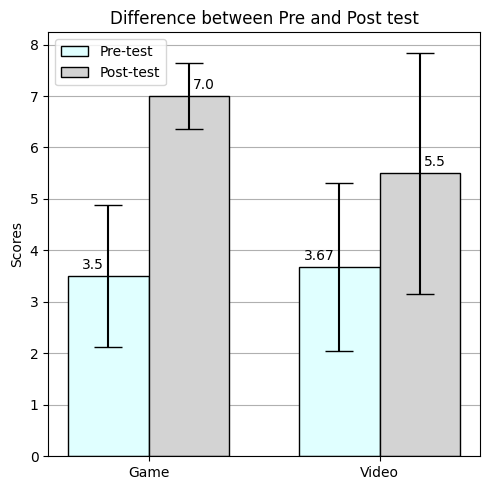

In [ ]:
pre_mean,pre_std=(round(game_mean_Pre,2),round(video_mean_Pre,2)),(game_std_Pre, video_std_Pre)
post_mean,post_std=(round(game_mean_Post,2),round(video_mean_Post,2)),(game_std_Post,video_std_Post)

ind = np.arange(len(pre_mean))  # the x locations for the groups
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(5, 5))
#fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, pre_mean, width, yerr=pre_std, align='center',
                label='Pre-test',        capsize=10,edgecolor='black',zorder=2,
       color=['lightcyan'])
rects2 = ax.bar(ind + width/2, post_mean, width, yerr=post_std, align='center',edgecolor='black',
                label='Post-test',        capsize=10,zorder=2,
       color=['lightgray'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Difference between Pre and Post test')
ax.set_xticks(ind)
ax.set_xticklabels(('Game', 'Video'))
ax.legend()
ax.yaxis.grid(False)
autolabel(rects1, "left")
autolabel(rects2, "right")
ax.yaxis.grid(True)
fig.tight_layout()

#plt.show()
plt.savefig('pre_post_diffSD.jpg',dpi=900)
plt.savefig('pre_post_diffSD.pdf',dpi=1300)

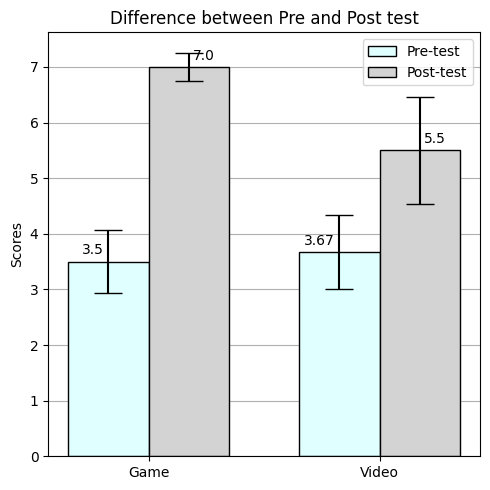

In [ ]:
pre_mean,pre_std=(round(game_mean_Pre,2),round(video_mean_Pre,2)),(game_se_Pre, video_se_Pre)
post_mean,post_std=(round(game_mean_Post,2),round(video_mean_Post,2)),(game_se_Post,video_se_Post)

ind = np.arange(len(pre_mean))  # the x locations for the groups
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(5, 5))
#fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, pre_mean, width, yerr=pre_std, align='center',
                label='Pre-test',        capsize=10,edgecolor='black',zorder=2,
       color=['lightcyan'])
rects2 = ax.bar(ind + width/2, post_mean, width, yerr=post_std, align='center',edgecolor='black',
                label='Post-test',        capsize=10,zorder=2,
       color=['lightgray'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Difference between Pre and Post test')
ax.set_xticks(ind)
ax.set_xticklabels(('Game', 'Video'))
ax.legend()
ax.yaxis.grid(False)
autolabel(rects1, "left")
autolabel(rects2, "right")
ax.yaxis.grid(True)
fig.tight_layout()

#plt.show()
plt.savefig('pre_post_diff.jpg',dpi=900)
plt.savefig('pre_post_diff.pdf',dpi=1300)

Grouped Percentage Difference

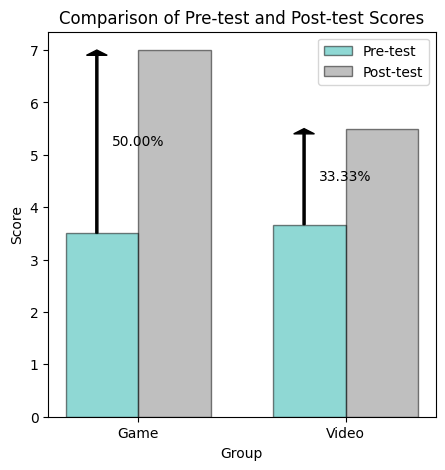

In [ ]:
# Assuming you have a DataFrame named 'data' with four columns: 'Group', 'Pre-test', and 'Post-test'
data = pd.DataFrame({'Group': ['Game', 'Game', 'Video', 'Video'],
                     'Test': ['Pre', 'Post', 'Pre', 'Post'],
                     'Score': [game_mean_Pre, game_mean_Post, video_mean_Pre, video_mean_Post]})

# Pivot the data to get separate columns for pre-test and post-test scores
pivot_data = data.pivot(index='Group', columns='Test', values='Score')

# Calculate the percentage difference
pivot_data['Percentage Difference'] = ((pivot_data['Post'] - pivot_data['Pre']) / pivot_data[['Post', 'Pre']].max(axis=1)) * 100

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(5, 5))
#fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(pivot_data))
colors = ['g' if diff >= 0 else 'r' for diff in pivot_data['Percentage Difference']]
pre_bar = ax.bar(index, pivot_data['Pre'], bar_width, color='lightseagreen', alpha=0.5, label='Pre-test',edgecolor='black',zorder=2,)
post_bar = ax.bar(index + bar_width, pivot_data['Post'], bar_width, color='grey', alpha=0.5, label='Post-test',edgecolor='black',zorder=2,)

# Add arrows with pointy arrowheads for comparison
for i, diff in enumerate(pivot_data['Percentage Difference']):
    if diff >= 0:
        x_start = index[i] + bar_width / 2
        y_start = min(pivot_data['Pre'][i], pivot_data['Post'][i])
        x_end = index[i] + bar_width / 2
        y_end = min(pivot_data['Pre'][i], pivot_data['Post'][i]) + abs(pivot_data['Post'][i] - pivot_data['Pre'][i])
        dx = x_end - x_start
        dy = y_end - y_start
  #      arrow = patches.FancyArrow(x_start, y_start, dx, dy, width=0.02, head_width=0.15, head_length=0.2, length_includes_head=True,
     #                              color='black', arrowstyle='->')
        arrow = patches.FancyArrow(x_start-0.2, y_start, dx, dy, width=0.01, head_width=0.1, head_length=0.1, length_includes_head=True,
                                   color='black')
        ax.add_patch(arrow)
        ax.text(x_start + dx/2, y_start + dy/2, f'{abs(diff):.2f}%', ha='center', va='center')
    else:
        x_start = index[i] + bar_width / 2
        y_start = max(pivot_data['Pre'][i], pivot_data['Post'][i])
        x_end = index[i] + bar_width / 2
        y_end = max(pivot_data['Pre'][i], pivot_data['Post'][i]) - abs(pivot_data['Post'][i] - pivot_data['Pre'][i])
        dx = x_end - x_start
        dy = y_end - y_start
        arrow = patches.FancyArrow(x_start, y_start, dx, dy, width=0.02, head_width=0.15, head_length=0.2, length_includes_head=True,
                                   color='black')
        ax.add_patch(arrow)
        ax.text(x_start + dx/2, y_start + dy/2, f'{abs(diff):.2f}%', ha='center', va='center')

# Set labels and title
ax.set_xlabel('Group')
ax.set_ylabel('Score')
ax.set_title('Comparison of Pre-test and Post-test Scores')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(pivot_data.index)
ax.legend()

#plt.show()
plt.savefig('pre_post__percentage_diff.jpg',dpi=900)
plt.savefig('pre_post__percentage_diff.pdf',dpi=1300)

Game Knowledge gain vs Video Knowledge Gain

In [ ]:
print(pre_mean,pre_std,post_mean,post_std)

(3.5, 3.67) (0.5627314338711378, 0.6666666666666667) (7.0, 5.5) (0.25819888974716115, 0.9574271077563382)


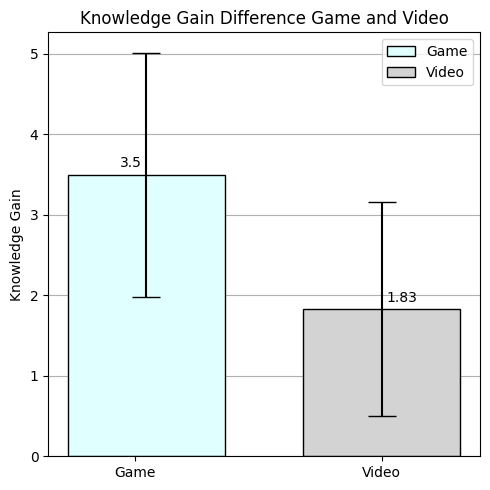

In [ ]:
pre_mean,pre_std=(round(game_mean_Kg,2)),(game_std_Kg)
post_mean,post_std=(round(video_mean_Kg,2)),(video_std_Kg)

ind = 0.5  # the x locations for the groups
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(5, 5))
#fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, pre_mean, width, yerr=pre_std,
                label='Game',        capsize=10,
       color=['lightcyan'],edgecolor='black',zorder=2,)
rects2 = ax.bar(ind + width, post_mean, width, yerr=post_std,
                label='Video',        capsize=10,
       color=['lightgray'],edgecolor='black',zorder=2,)


ax.set_ylabel('Knowledge Gain')
#set the label position
ax.set_xticks([0.3,0.85])
ax.set_xticklabels(['Game','Video'])

ax.set_title('Knowledge Gain Difference Game and Video')
ax.yaxis.grid(True)
ax.legend()

autolabel(rects1, "left")
autolabel(rects2, "right")

# Save the figure and show
plt.tight_layout()

#adjust position of x-axis label

plt.savefig('Knowledge_gainSD.jpg',dpi=900)
plt.savefig('Knowledge_gainSD.pdf',dpi=1300)

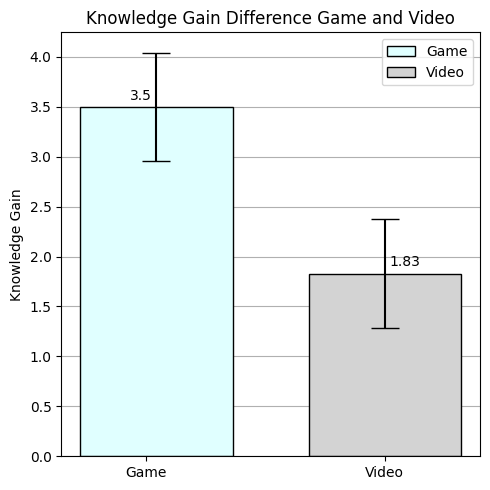

In [ ]:
pre_mean,pre_std=(round(game_mean_Kg,2)),(game_se_Kg)
post_mean,post_std=(round(video_mean_Kg,2)),(video_se_Kg)

ind = 0.5  # the x locations for the groups
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(5, 5))
#fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, pre_mean, width, yerr=pre_std,
                label='Game',        capsize=10,
       color=['lightcyan'],edgecolor='black',zorder=2,)
rects2 = ax.bar(ind + width, post_mean, width, yerr=post_std,
                label='Video',        capsize=10,
       color=['lightgray'],edgecolor='black',zorder=2,)


ax.set_ylabel('Knowledge Gain')
#set the label position
ax.set_xticks([0.3,0.85])
ax.set_xticklabels(['Game','Video'])

ax.set_title('Knowledge Gain Difference Game and Video')
ax.yaxis.grid(True)
ax.legend()

autolabel(rects1, "left")
autolabel(rects2, "right")

# Save the figure and show
plt.tight_layout()

#adjust position of x-axis label

plt.savefig('Knowledge_gain.jpg',dpi=900)
plt.savefig('Knowledge_gain.pdf',dpi=1300)

In [ ]:
import scipy.stats as stats


column_definition = "Knowledge_gain" %df_video["Knowledge_gain"]
column_quiz = "Knowledge_gain"

# Extract the data from the DataFrames
data_definition = df_video[column_definition]
data_quiz = df_game[column_quiz]

# One-way ANOVA
f_value, p_value_anova = stats.f_oneway(data_definition, data_quiz)
if p_value_anova <= 0.05:
    print("ANOVA result: statistically significant (p-value ≤ 0.05)")
else:
    print("ANOVA result: not statistically significant (p-value > 0.05)")

# Independent samples t-test
t_value, p_value_ttest = stats.ttest_ind(pd.to_numeric(data_definition),pd.to_numeric(data_quiz))
if p_value_ttest <= 0.05:
    print("t-test result: statistically significant (p-value ≤ 0.05)")
else:
    print("t-test result: not statistically significant (p-value > 0.05)")


# Print ANOVA result in APA style
anova_result = f"One-way ANOVA: F({len(data_definition)-1}, {len(data_quiz)-1}) = {f_value:.2f}, p = {p_value_anova:.3f}"
print("ANOVA result (APA style):")
print(anova_result)
print()

# Print t-test result in APA style
ttest_result = f"Independent samples t-test: t({len(data_definition)+len(data_quiz)-2}) = {t_value:.2f}, p = {p_value_ttest:.3f}"
print("t-test result (APA style):")
print(ttest_result)

ANOVA result: not statistically significant (p-value > 0.05)
t-test result: not statistically significant (p-value > 0.05)
ANOVA result (APA style):
One-way ANOVA: F(5, 5) = 4.10, p = 0.070

t-test result (APA style):
Independent samples t-test: t(10) = -2.02, p = 0.070
